In [3]:
!mkdir blast

In [7]:
!gunzip blast/uniprotkb_taxonomy_id_72025_OR_taxonomy_2024_10_01.fasta.gz

In [11]:
!makeblastdb -in blast/uniprotkb_taxonomy_id_72025_OR_taxonomy_2024_10_01.fasta -out blast/faba_arabidopsis \
-dbtype prot



Building a new DB, current time: 10/01/2024 12:47:51
New DB name:   /home/amogus/lupinus_denovo/cd-hit/blast/faba_arabidopsis
New DB title:  blast/uniprotkb_taxonomy_id_72025_OR_taxonomy_2024_10_01.fasta
Sequence type: Protein
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 18550 sequences in 0.763904 seconds.




In [ ]:
!blastx -db blast/faba_arabidopsis -out blast/cd_hit_classic_annot -evalue 0.05 -query cd_hit_out_classic.fasta \
-outfmt 6 -max_target_seqs 1 -num_threads 20

In [18]:
!head -5 blast/cd_hit_classic_annot

TRINITY_DN463105_c0_g1_i1	sp|Q9S7G6|PNP2_ARATH	85.000	20	3	0	424	365	334	353	5.51e-04	38.1
TRINITY_DN463123_c0_g1_i1	sp|F4JVN6|TPPII_ARATH	61.538	26	10	0	310	233	1010	1035	4.94e-06	43.1
TRINITY_DN463087_c0_g1_i1	sp|B6EUB3|PDS5A_ARATH	76.923	26	6	0	220	297	799	824	1.45e-07	47.0
TRINITY_DN463117_c0_g1_i1	sp|Q9FFG1|SDN2_ARATH	100.000	71	0	0	213	1	284	354	1.68e-45	150
TRINITY_DN463129_c0_g1_i1	sp|Q93ZB6|DCUP1_ARATH	82.609	23	4	0	71	3	58	80	2.29e-06	45.8


In [22]:
!grep -c "_i1" blast/cd_hit_classic_annot

208593


In [19]:
!head -5 quant/Andromeda_139.1/abundance.tsv

target_id	length	eff_length	est_counts	tpm
TRINITY_DN463065_c0_g1_i1	218	104.466	0	0
TRINITY_DN463105_c0_g1_i1	425	302.655	0	0
TRINITY_DN463083_c0_g1_i1	238	121.857	2	0.200563
TRINITY_DN463163_c0_g1_i1	368	246.106	2	0.0993069


In [38]:
import pandas as pd

# Чтение первой таблицы (blast/cd_hit_classic_annot)
blast_df = pd.read_csv('blast/cd_hit_classic_annot', sep='\t', header=None)
blast_df.columns = ['target_id', 'protein_id', 'perc_identity', 'alignment_length', 'mismatches', 'gap_opens', 
                    'q_start', 'q_end', 's_start', 's_end', 'e_value', 'bit_score']

# Чтение второй таблицы
counts_df = pd.read_csv('quant/Andromeda_139.1/abundance.tsv', sep='\t')

# Объединение таблиц по первому столбцу (target_id) и добавление столбца protein_id из первой таблицы
merged_df = pd.merge(counts_df, blast_df[['target_id', 'protein_id']], on='target_id', how='left')

# Фильтрация строк, где в 'protein_id' не NaN
filtered_df = merged_df.dropna(subset=['protein_id'])

# Разделение target_id для извлечения индекса (например, i1, i2, i3)
# Предполагается, что формат target_id всегда такой, что индекс в конце строки после '_i'
filtered_df['index_part'] = filtered_df['target_id'].str.extract(r'_i(\d+)$').astype(int)

# Сортировка по target_id и tpm (от большего к меньшему)
filtered_df = filtered_df.sort_values(by=['tpm', 'target_id'], ascending=[False, False])

# Удаление дубликатов по target_id, оставляя строку с наибольшим tpm
unique_df = filtered_df.drop_duplicates(subset='target_id', keep='first')

# Далее, если необходимо, можно отсортировать уникальную таблицу по индексу, чтобы вернуть их в правильном порядке
# Сортировка по target_id и индексу
unique_df = unique_df.sort_values(by=['target_id','tpm'], ascending=[False, False])

# Вывод первых строк результата
print(unique_df.head(30))

# Подсчет количества совпадающих значений в столбце protein_id
matching_count = unique_df['protein_id'].notnull().sum()

# Вывод количества совпадающих значений
print(f'Количество совпадающих значений во втором столбце первой таблицы: {matching_count}')

# Сохранение результата в файл
unique_df.to_csv('quant/Andromeda_139.1/abundance_merge.tsv', sep='\t', index=False)


/tmp/ipykernel_141871/255595876.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index_part'] = filtered_df['target_id'].str.extract(r'_i(\d+)$').astype(int)


                       target_id  length  eff_length  est_counts        tpm  \
399210     TRINITY_DN99_c0_g1_i1    1118    995.2220    227.0000   2.787260   
332648    TRINITY_DN999_c3_g1_i1     213     99.9819      0.0000   0.000000   
332645    TRINITY_DN999_c1_g1_i1     495    372.4810      0.0000   0.000000   
332633    TRINITY_DN999_c0_g2_i2    1574   1451.2200    194.7810   1.640150   
332632    TRINITY_DN999_c0_g2_i1    1963   1840.2200    504.2190   3.348270   
332643   TRINITY_DN999_c0_g1_i20    1726   1603.2200     85.6059   0.652502   
332638   TRINITY_DN999_c0_g1_i19    4131   4008.2200    137.2180   0.418340   
332634   TRINITY_DN999_c0_g1_i18     937    814.2800   1242.3200  18.643700   
332635   TRINITY_DN999_c0_g1_i17    4703   4580.2200   1872.5700   4.996010   
332641   TRINITY_DN999_c0_g1_i12    1166   1043.2200    164.0720   1.921890   
491328  TRINITY_DN9999_c0_g1_i56    1192   1069.2200      0.0000   0.000000   
491314  TRINITY_DN9999_c0_g1_i54    1522   1399.2200

In [ ]:
!conda install pandas

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - bioconda
Platform: linux-64

In [6]:
!head quant/Andromeda_139.1/abundance_merge.tsv

target_id	length	eff_length	est_counts	tpm	protein_id
TRINITY_DN463065_c0_g1_i1	218	104.466	0.0	0.0	
TRINITY_DN463105_c0_g1_i1	425	302.655	0.0	0.0	sp|Q9S7G6|PNP2_ARATH
TRINITY_DN463083_c0_g1_i1	238	121.857	2.0	0.200563	
TRINITY_DN463163_c0_g1_i1	368	246.106	2.0	0.0993069	
TRINITY_DN463113_c0_g1_i1	204	92.2905	0.0	0.0	
TRINITY_DN463106_c0_g1_i1	307	186.257	0.0	0.0	
TRINITY_DN463123_c0_g1_i1	331	209.651	0.0	0.0	sp|F4JVN6|TPPII_ARATH
TRINITY_DN463161_c0_g1_i1	241	124.538	0.0	0.0	
TRINITY_DN463087_c0_g1_i1	299	178.544	0.0	0.0	sp|B6EUB3|PDS5A_ARATH


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2.robjects import r, pandas2ri

# Включаем автоматическое преобразование Pandas DataFrame в R DataFrame
pandas2ri.activate()

# Укажите пути к вашим данным Kallisto для различных условий
counts_file_Rep1_treat = "quant/Andromeda_Rep1_139.1/abundance.tsv"
counts_file_Rep2_treat = "quant/Andromeda_Rep2_139.1/abundance.tsv"
counts_file_Rep3_treat = "quant/Andromeda_Rep3_139.1/abundance.tsv"

counts_file_Rep1_control = "quant/Andromeda_Rep1_Control/abundance.tsv"
counts_file_Rep2_control = "quant/Andromeda_Rep2_Control/abundance.tsv"
counts_file_Rep3_control = "quant/Andromeda_Rep3_Control/abundance.tsv"

# Загрузите данные в Pandas DataFrame
counts_Rep1_control = pd.read_csv(counts_file_Rep1_control, sep='\t')
counts_Rep2_control = pd.read_csv(counts_file_Rep2_control, sep='\t')
counts_Rep3_control = pd.read_csv(counts_file_Rep3_control, sep='\t')

counts_Rep1_treatment = pd.read_csv(counts_file_Rep1_treat, sep='\t')
counts_Rep2_treatment = pd.read_csv(counts_file_Rep2_treat, sep='\t')
counts_Rep3_treatment = pd.read_csv(counts_file_Rep3_treat, sep='\t')

# Извлечение необходимых столбцов (например, target_id и est_counts)
counts_Rep1_control = counts_Rep1_control[['target_id', 'est_counts']]
counts_Rep2_control = counts_Rep2_control[['target_id', 'est_counts']]
counts_Rep3_control = counts_Rep3_control[['target_id', 'est_counts']]

counts_Rep1_treatment = counts_Rep1_treatment[['target_id', 'est_counts']]
counts_Rep2_treatment = counts_Rep2_treatment[['target_id', 'est_counts']]
counts_Rep3_treatment = counts_Rep3_treatment[['target_id', 'est_counts']]

# Установите target_id в качестве индекса
counts_Rep1_control.set_index('target_id', inplace=True)
counts_Rep2_control.set_index('target_id', inplace=True)
counts_Rep3_control.set_index('target_id', inplace=True)

counts_Rep1_treatment.set_index('target_id', inplace=True)
counts_Rep2_treatment.set_index('target_id', inplace=True)
counts_Rep3_treatment.set_index('target_id', inplace=True)

# Объединение подсчетов в один DataFrame
# Объединение по индексу и добавление префиксов для различения условий
counts_combined = pd.concat([counts_Rep1_control, counts_Rep2_control, counts_Rep3_control,
                             counts_Rep1_treatment, counts_Rep2_treatment, counts_Rep3_treatment], axis=1)
counts_combined.columns = ['Andromeda_Rep1_Control', 'Andromeda_Rep2_Control', 'Andromeda_Rep3_Control',
                           'Andromeda_Rep1_139.1', 'Andromeda_Rep2_139.1', 'Andromeda_Rep3_139.1']
counts_combined = counts_combined.astype(int)
# Создание объекта DESeq2
# Теперь нужно создать объект DESeq2
# Загрузите пакет DESeq2 в R
r('library(DESeq2)')

# Конвертируйте DataFrame в R DataFrame
counts_r = pandas2ri.py2rpy(counts_combined)
r.assign('counts_r', counts_r)
# Проверка, что преобразование прошло успешно
# Создание объекта DESeqDataSet
# Создание датафрейма с условиями
col_data = pd.DataFrame({
    'condition': ['control', 'control', 'control', 'treated', 'treated', 'treated']
}, index=['Andromeda_Rep1_Control', 'Andromeda_Rep2_Control', 'Andromeda_Rep3_Control',
          'Andromeda_Rep1_139.1', 'Andromeda_Rep2_139.1', 'Andromeda_Rep3_139.1'])  # исправлена опечатка

#conditions = ['Andromeda_Control'] * len(counts_control) + ['Andromeda_139.1'] * len(counts_treatment)
col_data_r = pandas2ri.py2rpy(col_data)
r.assign('col_data_r', col_data_r)
#print(conditions[0:15])
# Проверка, что кол_data создана правильно
print("Данные условий:")
print(col_data_r)
print(counts_combined.head())
print(f"Размер counts_combined: {counts_combined.shape}")  # Проверка размеров
print("Названия столбцов counts_combined:", counts_combined.columns)
print("Названия строк col_data:", col_data.index)

# Проверка, что кол_data создана правильно
# Создание DESeqDataSet
dds = r('DESeqDataSetFromMatrix(countData=counts_r, colData=col_data_r, design=~condition)')
r.assign('dds', dds)
# Выполнение анализа DESeq
r('dds <- DESeq(dds)')

# Получение результатов и преобразование в DataFrame в R
r('res_df <- as.data.frame(results(dds))')

# Преобразование R DataFrame в Pandas DataFrame
results_df = r('res_df')
results_df = pandas2ri.rpy2py(results_df)

# Вывод первых строк
print(results_df.head())


# Визуализация результатов
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=results_df, x='log2FoldChange', y='-log10(pvalue)', hue='significant')
#plt.title('Volcano Plot')
#plt.xlabel('Log2 Fold Change')
#plt.ylabel('-Log10 P-value')
#plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
#plt.show()

# Сохранение результатов
#results_df.to_csv('Andromeda_139.1_differential_expression_results.csv', index=False)


Данные условий:
                       condition
Andromeda_Rep1_Control   control
Andromeda_Rep2_Control   control
Andromeda_Rep3_Control   control
Andromeda_Rep1_139.1     treated
Andromeda_Rep2_139.1     treated
Andromeda_Rep3_139.1     treated

                           Andromeda_Rep1_Control  Andromeda_Rep2_Control  \
target_id                                                                   
TRINITY_DN463065_c0_g1_i1                       0                       0   
TRINITY_DN463105_c0_g1_i1                       0                       1   
TRINITY_DN463083_c0_g1_i1                       0                       0   
TRINITY_DN463163_c0_g1_i1                       0                       1   
TRINITY_DN463113_c0_g1_i1                       0                       0   

                           Andromeda_Rep3_Control  Andromeda_Rep1_139.1  \
target_id                                                                 
TRINITY_DN463065_c0_g1_i1                       0             

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In DESeqDataSet(se, design = design, ignoreRank) :
R[write to console]: 
 
R[write to console]:  some variables in design formula are characters, converting to factors

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



                           baseMean  log2FoldChange     lfcSE      stat  \
TRINITY_DN463065_c0_g1_i1  0.000000             NaN       NaN       NaN   
TRINITY_DN463105_c0_g1_i1  0.227073       -1.474679  4.080473 -0.361399   
TRINITY_DN463083_c0_g1_i1  0.297404        1.448871  4.029691  0.359549   
TRINITY_DN463163_c0_g1_i1  0.451036        0.135718  4.037871  0.033611   
TRINITY_DN463113_c0_g1_i1  0.000000             NaN       NaN       NaN   

                             pvalue  padj  
TRINITY_DN463065_c0_g1_i1       NaN   NaN  
TRINITY_DN463105_c0_g1_i1  0.717801   NaN  
TRINITY_DN463083_c0_g1_i1  0.719184   NaN  
TRINITY_DN463163_c0_g1_i1  0.973187   NaN  
TRINITY_DN463113_c0_g1_i1       NaN   NaN  


In [158]:
import pandas as pd

# Чтение первой таблицы (blast/cd_hit_classic_annot)
blast_df = pd.read_csv('blast/cd_hit_classic_annot', sep='\t', header=None)
blast_df.columns = ['target_id', 'protein_id', 'perc_identity', 'alignment_length', 'mismatches', 'gap_opens', 
                    'q_start', 'q_end', 's_start', 's_end', 'e_value', 'bit_score']

# Используем таблицу results_df из DESeq2
# Предположим, что в ней есть столбец 'target_id'
results_df_proc = results_df.reset_index()  # Сброс индекса, чтобы 'target_id' стал колонкой
results_df_proc = results_df_proc.rename(columns={'index': 'target_id'})

# Объединение таблиц по столбцу target_id и добавление protein_id и других столбцов из первой таблицы
merged_df = pd.merge(results_df_proc, blast_df[['target_id', 'protein_id']], on='target_id', how='left')

# Фильтрация строк, где в 'protein_id' не NaN и где присутствуют значения в 'log2FoldChange' и 'padj'
filtered_df = merged_df.dropna(subset=['protein_id', 'log2FoldChange', 'padj'])

# Создание функции для фильтрации по log2FoldChange
def filter_log2fc(group):
    pos_log2fc = group['log2FoldChange'] > 0
    neg_log2fc = group['log2FoldChange'] < 0
    
    # Если все значения log2FoldChange отрицательные, берем строку с минимальным значением log2FoldChange
    if all(neg_log2fc):
        return group.loc[group['log2FoldChange'].idxmin()].to_frame().T
    
    # Если все значения log2FoldChange положительные, берем строку с максимальным значением log2FoldChange
    elif all(pos_log2fc):
        return group.loc[group['log2FoldChange'].idxmax()].to_frame().T
    
    # Если есть и положительные, и отрицательные значения, удаляем такие protein_id
    else:
        return pd.DataFrame()  # Возвращаем пустой DataFrame, чтобы удалить этот protein_id

# Применение функции фильтрации к группам с одинаковым protein_id
unique_df = filtered_df.groupby('protein_id', group_keys=False).apply(filter_log2fc).reset_index(drop=True)

# Удаление строк, которые были пустыми после применения фильтрации
unique_df = unique_df.dropna(how='all')

# Далее можно отсортировать данные по необходимости
unique_df = unique_df.sort_values(by=['log2FoldChange', 'target_id'], ascending=[False, False])

# Сохранение результата в файл
unique_df.to_csv('quant/Andromeda_139.1_deseq.tsv', sep='\t', index=False)

print(unique_df)


                     target_id   baseMean log2FoldChange     lfcSE      stat  \
3321   TRINITY_DN9364_c0_g1_i4  34.850951       8.335104  3.118948  2.672409   
396   TRINITY_DN6569_c0_g1_i28  13.110266       6.928179  1.441422  4.806488   
1685  TRINITY_DN3762_c0_g1_i21   7.063632       6.034777  1.448462  4.166334   
3580    TRINITY_DN970_c0_g1_i2   5.875156       5.765327  3.913035  1.473365   
1135  TRINITY_DN5549_c0_g1_i47   5.757113       5.736597  1.982061  2.894258   
...                        ...        ...            ...       ...       ...   
2436  TRINITY_DN16605_c0_g1_i2   15.66801     -21.805335  3.910138 -5.576615   
4163  TRINITY_DN4796_c0_g1_i47  16.349228     -21.861046  3.909998 -5.591064   
1454   TRINITY_DN940_c0_g1_i96  16.576301     -21.879681  3.909953 -5.595893   
1542   TRINITY_DN8315_c0_g1_i1  16.576301     -21.879681  3.909953 -5.595893   
15    TRINITY_DN30079_c0_g1_i3  16.576301     -21.879681  3.909953 -5.595893   

        pvalue      padj               

/tmp/ipykernel_141871/3343980176.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_df = filtered_df.groupby('protein_id', group_keys=False).apply(filter_log2fc).reset_index(drop=True)


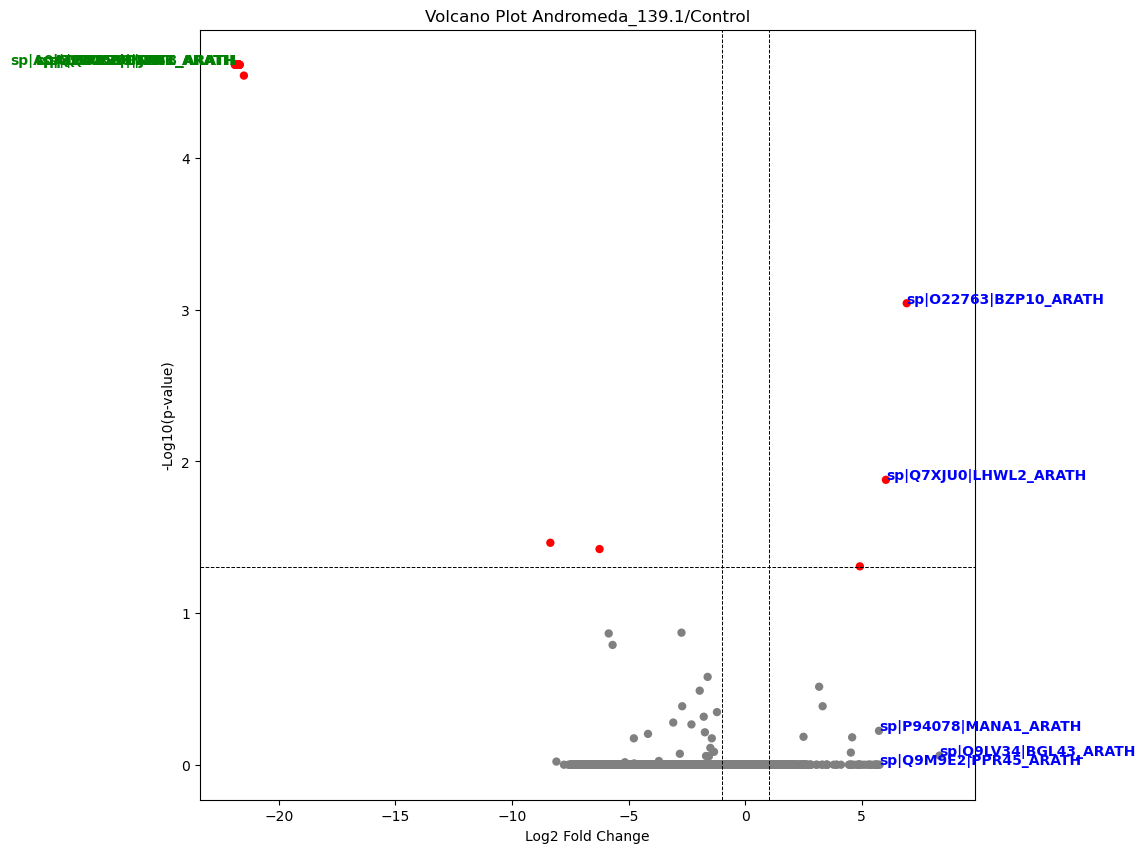

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Удаляем строки с NaN в padj и log2FoldChange
filtered_df_proc = unique_df.dropna(subset=['padj', 'log2FoldChange'])

# Преобразуем столбец padj и log2FoldChange в числовой формат, заменяя ошибки на NaN
filtered_df_proc['padj'] = pd.to_numeric(filtered_df_proc['padj'], errors='coerce')
filtered_df_proc['log2FoldChange'] = pd.to_numeric(filtered_df_proc['log2FoldChange'], errors='coerce')

# Удаляем строки, где padj или log2FoldChange не является числом или где padj <= 0
filtered_df_proc = filtered_df_proc[filtered_df_proc['padj'] > 0]
filtered_df_proc = filtered_df_proc.dropna(subset=['log2FoldChange'])

# Добавляем столбец с -log10(pvalue) для volcano plot
filtered_df_proc['-log10(pvalue)'] = -np.log10(filtered_df_proc['padj'])

# Порог для значимости (adjusted p-value < 0.05) и log2FoldChange > |1|
significance_threshold = 0.05
fold_change_threshold = 1

# Определение значимых данных
filtered_df_proc['significant'] = (filtered_df_proc['padj'] < significance_threshold) & \
                                  (np.abs(filtered_df_proc['log2FoldChange']) > fold_change_threshold)

# Выбираем 5 точек с самым высоким log2FoldChange и 5 с самым низким
top5_high_log2fc = filtered_df_proc.nlargest(5, 'log2FoldChange')
top5_low_log2fc = filtered_df_proc.nsmallest(5, 'log2FoldChange')

# Построение графика
plt.figure(figsize=(10, 10))

# Основной scatter plot
sns.scatterplot(x='log2FoldChange', y='-log10(pvalue)', hue='significant', 
                data=filtered_df_proc, edgecolor='none', palette={True: 'red', False: 'grey'}, legend=False)

# Добавляем линии порогов
plt.axhline(y=-np.log10(significance_threshold), color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=-fold_change_threshold, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=fold_change_threshold, color='black', linestyle='--', linewidth=0.7)

# Подписываем точки с самым высоким log2FoldChange
for i, row in top5_high_log2fc.iterrows():
    plt.text(row['log2FoldChange'], row['-log10(pvalue)'], row['protein_id'], 
             horizontalalignment='left', size='medium', color='blue', weight='semibold')

# Подписываем точки с самым низким log2FoldChange
for i, row in top5_low_log2fc.iterrows():
    plt.text(row['log2FoldChange'], row['-log10(pvalue)'], row['protein_id'], 
             horizontalalignment='right', size='medium', color='green', weight='semibold')

# Настройки графика
plt.title('Volcano Plot Andromeda_139.1/Control')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')

# Показываем график
plt.show()


/tmp/ipykernel_141871/1455702140.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_proc['padj'] = pd.to_numeric(filtered_df_proc['padj'], errors='coerce')
/tmp/ipykernel_141871/1455702140.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_proc['log2FoldChange'] = pd.to_numeric(filtered_df_proc['log2FoldChange'], errors='coerce')


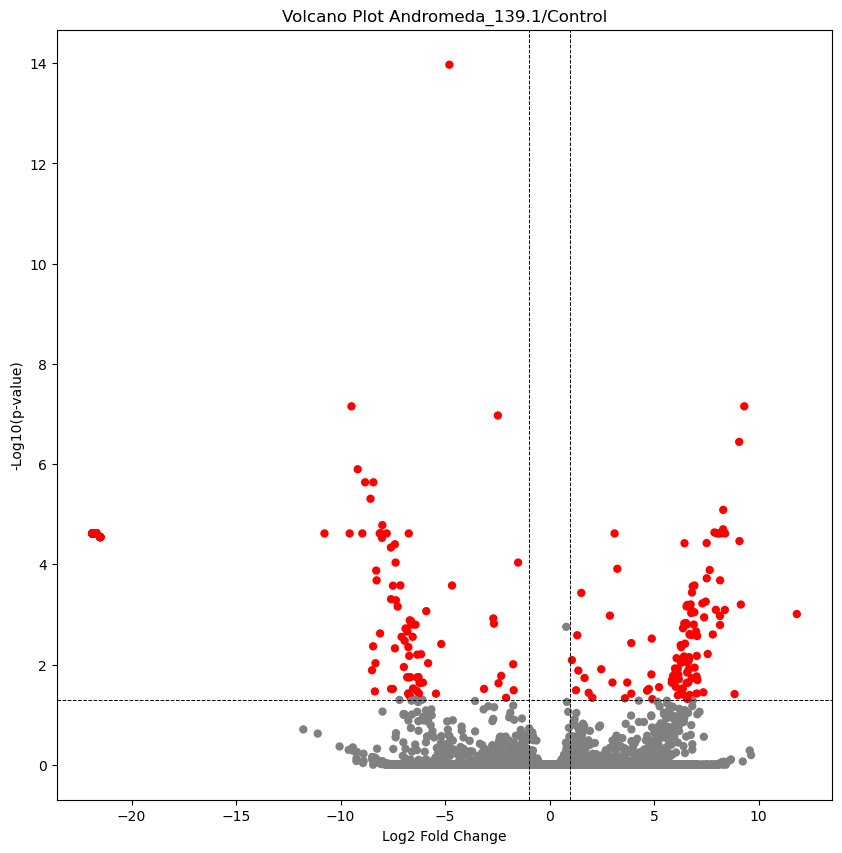

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Удаляем строки с NaN в padj и log2FoldChange
filtered_df_proc = results_df.dropna(subset=['padj', 'log2FoldChange'])

# Преобразуем столбец padj и log2FoldChange в числовой формат, заменяя ошибки на NaN
filtered_df_proc['padj'] = pd.to_numeric(filtered_df_proc['padj'], errors='coerce')
filtered_df_proc['log2FoldChange'] = pd.to_numeric(filtered_df_proc['log2FoldChange'], errors='coerce')

# Удаляем строки, где padj или log2FoldChange не является числом или где padj <= 0
filtered_df_proc = filtered_df_proc[filtered_df_proc['padj'] > 0]
filtered_df_proc = filtered_df_proc.dropna(subset=['log2FoldChange'])

# Добавляем столбец с -log10(pvalue) для volcano plot
filtered_df_proc['-log10(pvalue)'] = -np.log10(filtered_df_proc['padj'])

# Порог для значимости (adjusted p-value < 0.05) и log2FoldChange > |1|
significance_threshold = 0.05
fold_change_threshold = 1

# Определение значимых данных
filtered_df_proc['significant'] = (filtered_df_proc['padj'] < significance_threshold) & \
                                  (np.abs(filtered_df_proc['log2FoldChange']) > fold_change_threshold)

# Выбираем 5 точек с самым высоким log2FoldChange и 5 с самым низким
top5_high_log2fc = filtered_df_proc.nlargest(5, 'log2FoldChange')
top5_low_log2fc = filtered_df_proc.nsmallest(5, 'log2FoldChange')

# Построение графика
plt.figure(figsize=(10, 10))

# Основной scatter plot
sns.scatterplot(x='log2FoldChange', y='-log10(pvalue)', hue='significant', 
                data=filtered_df_proc, edgecolor='none', palette={True: 'red', False: 'grey'}, legend=False)

# Добавляем линии порогов
plt.axhline(y=-np.log10(significance_threshold), color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=-fold_change_threshold, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=fold_change_threshold, color='black', linestyle='--', linewidth=0.7)

# Подписываем точки с самым высоким log2FoldChange
#for i, row in top5_high_log2fc.iterrows():
#    plt.text(row['log2FoldChange'], row['-log10(pvalue)'], row['protein_id'], 
 #            horizontalalignment='left', size='medium', color='blue', weight='semibold')

# Подписываем точки с самым низким log2FoldChange
#for i, row in top5_low_log2fc.iterrows():
#    plt.text(row['log2FoldChange'], row['-log10(pvalue)'], row['protein_id'], 
#             horizontalalignment='right', size='medium', color='green', weight='semibold')

# Настройки графика
plt.title('Volcano Plot Andromeda_139.1/Control')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')

# Показываем график
plt.show()


In [187]:
r("round(cor(counts_r) ** 2, 2)")


array([[1.  , 0.3 , 0.77, 0.87, 0.86, 0.25],
       [0.3 , 1.  , 0.29, 0.29, 0.25, 0.8 ],
       [0.77, 0.29, 1.  , 0.89, 0.88, 0.2 ],
       [0.87, 0.29, 0.89, 1.  , 0.93, 0.21],
       [0.86, 0.25, 0.88, 0.93, 1.  , 0.19],
       [0.25, 0.8 , 0.2 , 0.21, 0.19, 1.  ]])

In [141]:
# Выполняем преобразование VST или rlog
#r.assign('unique_df', unique_df)
vst_data = r('vst(dds, blind=FALSE)')  # если данные большие, это предпочтительный метод
# или, если хотите использовать rlog:
# rlog_data = r('rlog(dds, blind=FALSE)')
r.assign('vst_data', vst_data)
# Извлечение матрицы нормализованных данных
norm_counts = r('assay(vst_data)')  # или rlog_data, если использовали rlog

# Преобразуем в Pandas DataFrame для дальнейшего использования в Python
norm_counts_df = pd.DataFrame(norm_counts, columns=col_data.index, index=counts_combined.index)

# Просмотр нормализованных данных
print(norm_counts_df)


                           Andromeda_Rep1_Control  Andromeda_Rep2_Control  \
target_id                                                                   
TRINITY_DN463065_c0_g1_i1                7.295784                7.295784   
TRINITY_DN463105_c0_g1_i1                7.295784                7.430076   
TRINITY_DN463083_c0_g1_i1                7.295784                7.295784   
TRINITY_DN463163_c0_g1_i1                7.295784                7.430076   
TRINITY_DN463113_c0_g1_i1                7.295784                7.295784   
...                                           ...                     ...   
TRINITY_DN136270_c0_g1_i1                7.626259                7.650323   
TRINITY_DN136282_c0_g1_i1                7.295784                7.295784   
TRINITY_DN136282_c0_g1_i3                7.295784                7.295784   
TRINITY_DN136282_c0_g1_i2                7.295784                7.295784   
TRINITY_DN136222_c0_g1_i1                7.295784                7.595639   

/tmp/ipykernel_141871/180064495.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(sample, (pca_df['PC1'][i], pca_df['PC2'][i]),


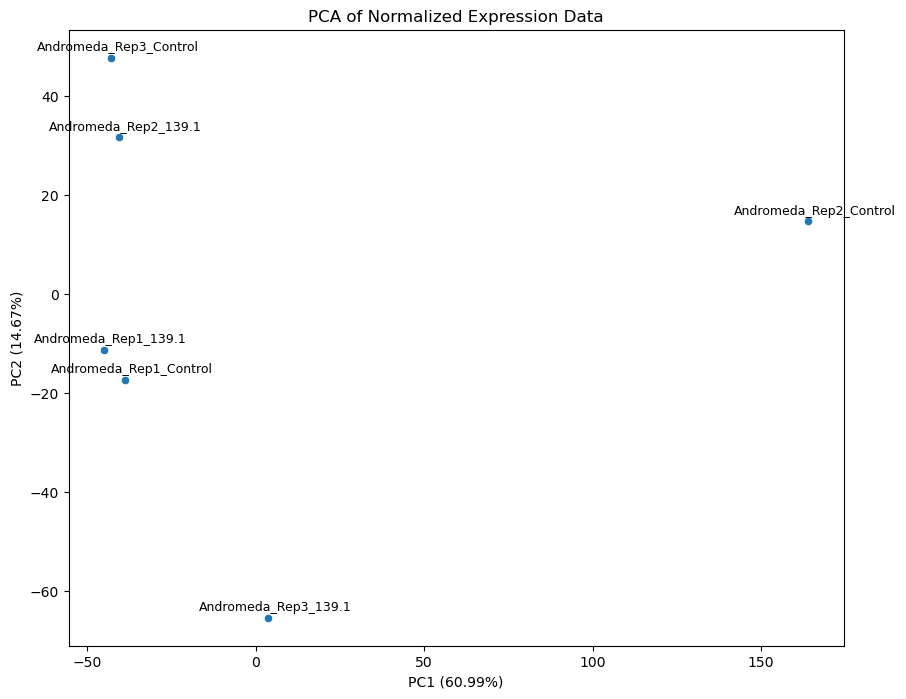

In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Транспонируем данные так, чтобы образцы были строками, а гены столбцами
norm_counts_transposed = norm_counts_df.T

# Выполняем PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(norm_counts_transposed)

# Преобразуем результат в DataFrame для визуализации
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=norm_counts_transposed.index)

# Визуализируем результаты PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
# Подписи для каждой точки (индексы образцов)
for i, sample in enumerate(pca_df.index):
    plt.annotate(sample, (pca_df['PC1'][i], pca_df['PC2'][i]), 
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)

# Настройки графика
plt.title('PCA of Normalized Expression Data')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.show()


/tmp/ipykernel_141871/1671274181.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(sample, (pca_df['PC1'][i], pca_df['PC2'][i]),


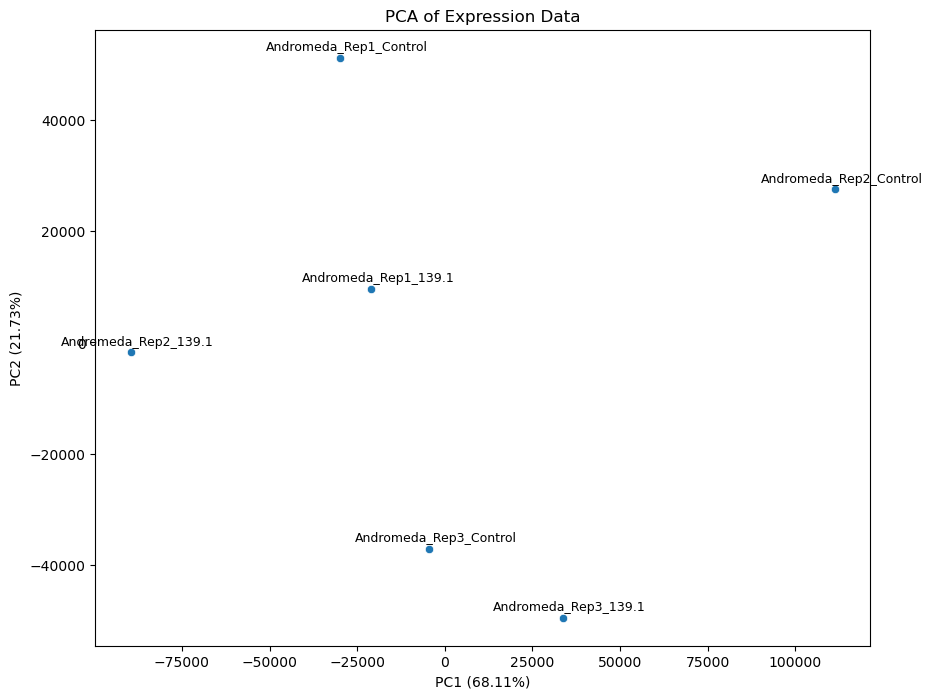

In [172]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Транспонируем данные так, чтобы образцы были строками, а гены столбцами
norm_counts_transposed = filtered_counts_combined.T

# Выполняем PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(norm_counts_transposed)

# Преобразуем результат в DataFrame для визуализации
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=norm_counts_transposed.index)

# Визуализируем результаты PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
# Подписи для каждой точки (индексы образцов)
for i, sample in enumerate(pca_df.index):
    plt.annotate(sample, (pca_df['PC1'][i], pca_df['PC2'][i]), 
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=9)

# Настройки графика
plt.title('PCA of Expression Data')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.show()


In [185]:
import pandas as pd
from rpy2.robjects import pandas2ri, r
from rpy2.robjects.packages import importr

# Включаем поддержку Pandas в rpy2
pandas2ri.activate()

# Импортируем необходимые библиотеки из R
pheatmap = importr('pheatmap')
RColorBrewer = importr('RColorBrewer')

# Создаем матрицу расстояний между образцами
r.assign('norm_counts_df', pandas2ri.py2rpy(norm_counts_df))
r('sampleDists <- dist(t(norm_counts_df))')

# Создаем матрицу расстояний
r('sampleDistMatrix <- as.matrix(sampleDists)')

# Настраиваем имена строк
r('rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$type, sep="-")')
r('colnames(sampleDistMatrix) <- NULL')

# Создаем палитру цветов
r('colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)')

# Генерируем тепловую карту
r('pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists, col=colors)')


PackageNotInstalledError: The R package "pheatmap" is not installed.

In [178]:
!conda install pheatmap -y

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - pheatmap

Current channels:

  - defaults
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/bioconda/linux-64

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


